Xccelerate Machine Learning Exam  
1. Analyze one of three datasets and report your findings.  
2. Solve the following business challenge:  
This is a MoX interview for the position of Data Scientist 
3. Explain what is Logistic Regression? Why do we use this regression  technique to model classification tasks? Can you think of a  situation where we can use Logistic Regression for a regression task? How will you use Logistic Regression to model multi-class classification?  

Put all your files in a zip and email your answers to  avishek.m@xccelerate.co and your mentor


# Q1

A) World data 

In [152]:
#Loading the original dataset
import pandas as pd

df = pd.read_csv('/Users/joycechung/Downloads/world-data-2023.csv')
pd.set_option('display.max_columns', None) #because our column names are too long, without it they are not fully shown in df.head()
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [153]:
df.shape
#Examining the shape of original dataset: 35 attributes, 195 countries 

(195, 35)

In [154]:
#checking the types of each feature in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [155]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [156]:
#Data organising & cleaning 

#renaming the 'Density' column for clarity
df.rename(columns={'Density\n(P/Km2)': 'Density (P/Km2)'}, inplace=True)

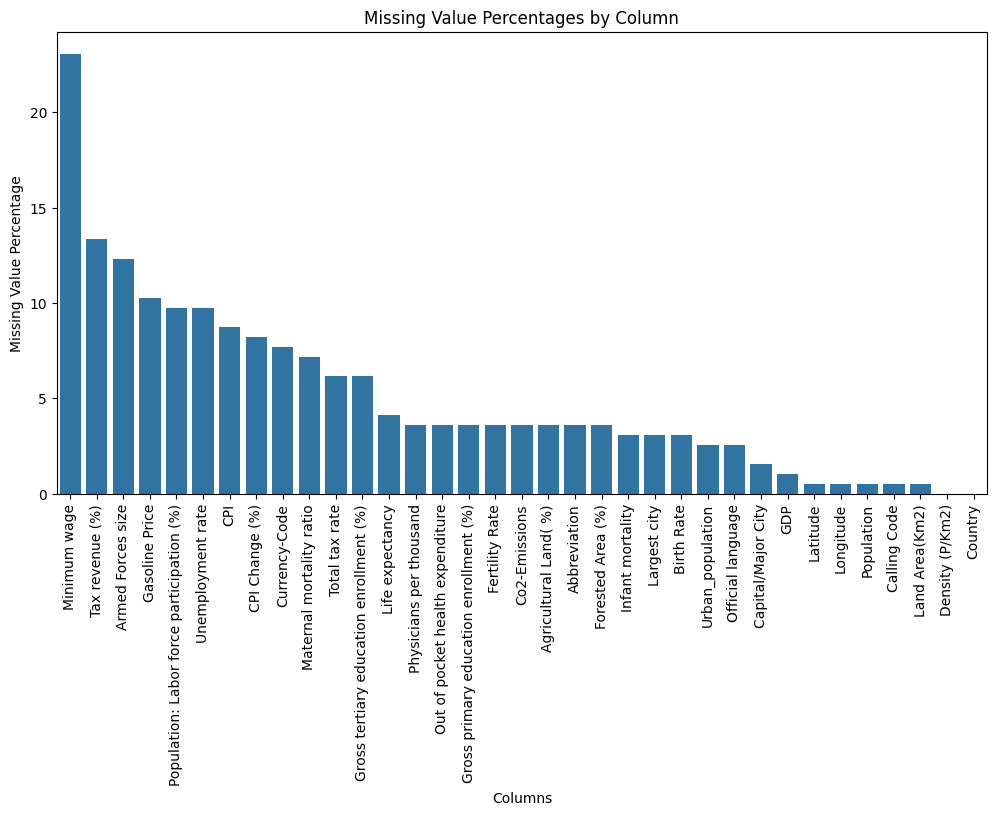

In [157]:
#Dealing with null values
#they shouldn't be replaced with 0, the values are just unknown for some countries

#Visualizing the missing value percentages for each column in your dataset using a bar plot:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing value percentages for each column
missing_percentages = df.isnull().mean() * 100

# Sort columns by missing value percentages in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.xticks(rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage')
plt.title('Missing Value Percentages by Column')
plt.show()

In [158]:
#Dropping irrelevant columns - Abbreviation, Calling code, Capital/major city

df.drop(['Abbreviation', 'Calling Code', 'Capital/Major City', 'Largest city'], axis=1, inplace=True)

In [159]:
#removing % signs with regex & renaming their column names with (%)
import re

# List of columns to process
columns_to_remove= ['Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)']
columns_to_process= ['Out of pocket health expenditure', 'Total tax rate', 'Unemployment rate']
# Remove '%' signs using regex for the selected columns
df[columns_to_remove] = df[columns_to_remove].replace('%', '', regex=True)
df[columns_to_process] = df[columns_to_process].replace('%', '', regex=True)

# Rename the column names with ' (%)'
df.rename(columns={col: col + ' (%)' for col in columns_to_process}, inplace=True)

In [160]:
#removing $ signs with regex & renaming their column names with (%)

# List of columns to process
columns_to_process= ['Gasoline Price', 'GDP', 'Minimum wage']
df[columns_to_process] = df[columns_to_process].replace('\$', '', regex=True)

# Rename the column names with ' (%)'
df.rename(columns={col: col + ' ($)' for col in columns_to_process}, inplace=True)

In [161]:
#removing , signs with regex 

df = df.replace(',', '', regex=True)

# # List of columns to process
# columns_to_process= ['Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'GDP ($)', 'Population', 'Urban_population', 'CPI']
# df[columns_to_process] = df[columns_to_process].replace('\,', '', regex=True)

In [162]:
df = df.apply(pd.to_numeric,errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density (P/Km2)                            195 non-null    int64  
 2   Agricultural Land( %)                      188 non-null    float64
 3   Land Area(Km2)                             194 non-null    float64
 4   Armed Forces size                          171 non-null    float64
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    float64
 7   CPI                                        178 non-null    float64
 8   CPI Change (%)                             179 non-null    float64
 9   Currency-Code                              180 non-null    object 
 10  Fertility Rate            

In [163]:
#Creating new df for imputation of NaN values 
#filing NaN values with the median value of their respective column to preserve central tendency 
import pandas as pd
import numpy as np

# Identify float columns
float_columns = df.select_dtypes(include=np.float64).columns

# Fill NaN values with the median of float columns
df_filled = df.copy()
df_filled[float_columns] = df_filled[float_columns].fillna(df_filled[float_columns].median())

In [212]:
df_filled.head(10)

,Country,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage ($),Official language,Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%),Urban_population,Latitude,Longitude
0,Afghanistan,60,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.430,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.120,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.950,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,40.0,468.0,31000.0,7.20,469.0,125.34,2.3,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,73.2,53.0,6.630,Catalan,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,Angola,26,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.710,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
5,Antigua and Barbuda,223,20.5,443.0,0.0,15.33,557.0,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,76.9,42.0,3.040,English,24.3,2.76,97118.0,62.45,16.5,43.0,5.36,23800.0,17.060816,-61.796428
6,Argentina,17,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,76.5,39.0,3.350,Spanish,17.6,3.96,44938712.0,61.30,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672
7,Armenia,104,58.9,29743.0,49000.0,13.99,5156.0,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,74.9,26.0,0.660,Armenian,81.6,4.40,2957731.0,55.60,20.9,22.6,16.99,1869848.0,40.069099,45.038189
8,Australia,3,48.2,7741220.0,58000.0,12.60,375908.0,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,82.7,6.0,13.590,NaN,19.6,3.68,25766605.0,65.50,23.0,47.4,5.27,21844756.0,-25.274398,133.775136
9,Austria,109,32.4,83871.0,21000.0,9.70,61448.0,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,81.6,5.0,1.045,German,17.9,5.17,8877067.0,60.70,25.4,51.4,4.67,5194416.0,47.516231,14.550072


In [165]:
null_counts = df_filled.isnull().sum().sort_values(ascending=False)
null_counts
#now the only null count is for official language and currency-code (str format)

Currency-Code                                15
Official language                             5
Country                                       0
Infant mortality                              0
Latitude                                      0
Urban_population                              0
Unemployment rate (%)                         0
Total tax rate (%)                            0
Tax revenue (%)                               0
Population: Labor force participation (%)     0
Population                                    0
Physicians per thousand                       0
Out of pocket health expenditure (%)          0
Minimum wage ($)                              0
Maternal mortality ratio                      0
Life expectancy                               0
Gross tertiary education enrollment (%)       0
Density (P/Km2)                               0
Gross primary education enrollment (%)        0
GDP ($)                                       0
Gasoline Price ($)                      

## Data visualisation
- Using plotly

In [129]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Part 1 - General observations of the entire world dataset 

In [214]:
#what's the most common official language shared among countries?

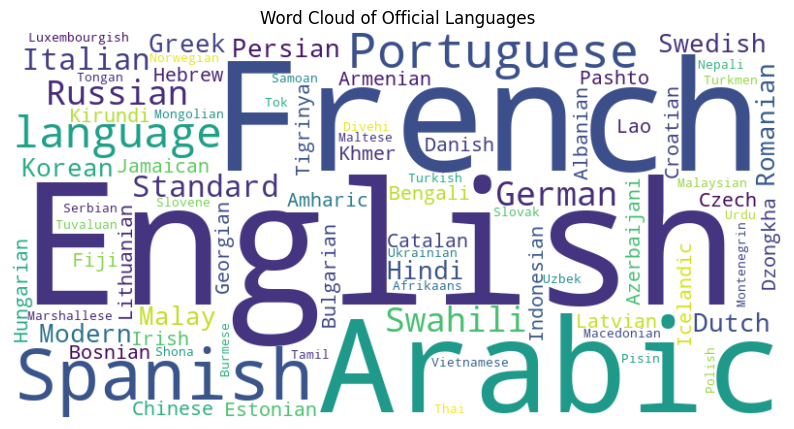

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_filled' with a column named 'Official language'

# Filter out NaN values from the 'Official language' column
filtered_languages = df_filled['Official language'].dropna()

# Combine all official languages into a single string
all_languages = ' '.join(filtered_languages)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_languages)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Official Languages')
plt.show()

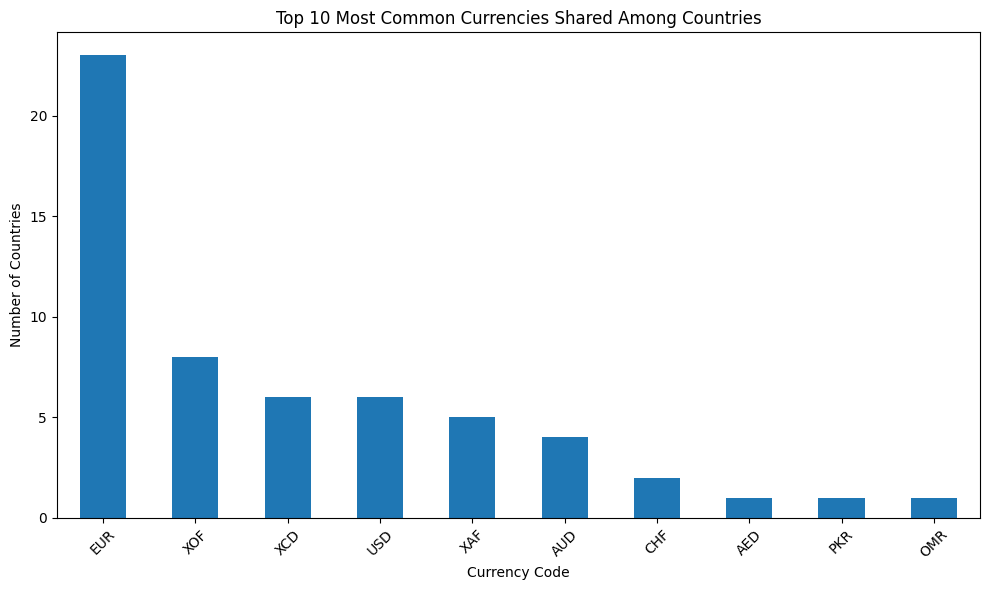

In [235]:
#what's the most common currency shared among countries? 
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Currency-Code' and count the occurrences
currency_counts = df_filled.groupby('Currency-Code')['Country'].nunique()

# Sort the currency counts in descending order
sorted_currency_counts = currency_counts.sort_values(ascending=False)

# Get the top 10 most common currencies
top_currencies = sorted_currency_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_currencies.plot(kind='bar')
plt.xlabel('Currency Code')
plt.ylabel('Number of Countries')
plt.title('Top 10 Most Common Currencies Shared Among Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
#map of countries coloured for Population 

In [257]:
import plotly.graph_objs as go
import plotly.offline as offline

# Create a trace
trace = go.Scattergeo(
    locationmode = 'country names',
    lon = df_filled['Longitude'],
    lat = df_filled['Latitude'],
    text = df_filled['Country'],
    marker = dict(
        size = df_filled['Population'] / 5000000,  # Adjust the size of the bubbles based on population
        sizemode = 'area',
        sizeref = 0.1,
        color = df_filled['Population'],
        colorscale = 'Viridis',
        reversescale = True,
        colorbar = dict(
            title = 'Population'
        ),
        line = dict(
            width = 0.5,
            color = 'rgb(40,40,40)'
        ),
        opacity = 0.7
    )
)

data = [trace]

# Define layout
layout = go.Layout(
    title = 'World Population Bubble Map',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection_type = 'equirectangular'
    )
)

# Create the figure
fig = go.Figure(data = data, layout = layout)

# Save the figure as an HTML file
offline.plot(fig, filename='bubble_map.html', auto_open=True)

'bubble_map.html'

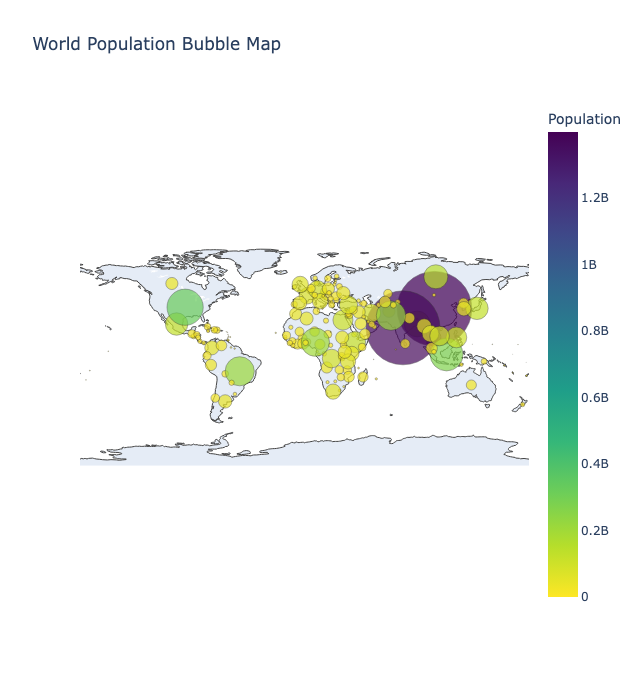

In [262]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (1).png') 

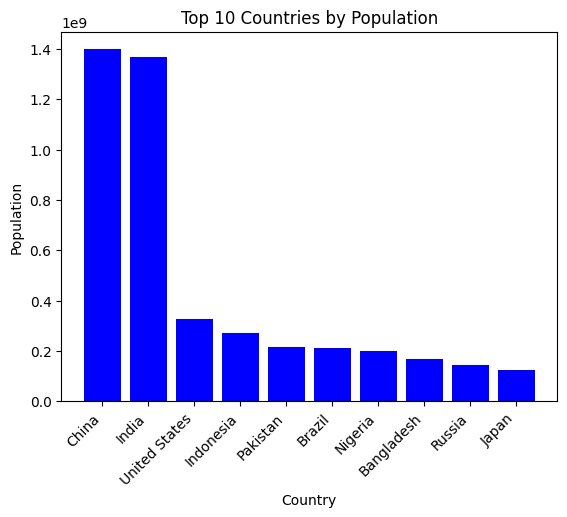

In [253]:
import matplotlib.pyplot as plt

# Sort the DataFrame by population in descending order
df_sorted = df_filled.sort_values('Population', ascending=False)

# Get the top 10 countries by population
top_10_countries = df_sorted.head(10)

# Create the bar plot
plt.bar(top_10_countries['Country'], top_10_countries['Population'], color='blue')

# Set the title and axis labels
plt.title('Top 10 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
#map of countries coloured for Density (P/Km2)

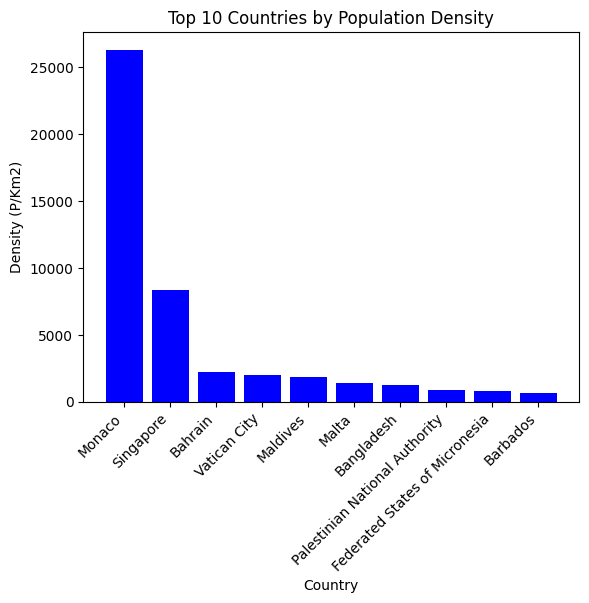

In [455]:
import matplotlib.pyplot as plt

# Sort the DataFrame by population density in descending order
df_sorted = df_filled.sort_values('Density (P/Km2)', ascending=False)

# Get the top 10 most dense countries
top_10_countries = df_sorted.head(10)

# Create the bar plot for the top 10 countries
plt.bar(top_10_countries['Country'], top_10_countries['Density (P/Km2)'], color='blue')

# Set the title and axis labels
plt.title('Top 10 Countries by Population Density')
plt.xlabel('Country')
plt.ylabel('Density (P/Km2)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [457]:
#Mapping a world map for life expetancy 

import plotly.graph_objects as go
import plotly.offline as offline
import pandas as pd

# Create the choropleth trace
trace = go.Choropleth(
    locations=df_filled['Country'],  # Country names
    locationmode='country names',
    z=df_filled['Life expectancy'],  # Life expectancy values
    text=df_filled['Country'],  # Text to display on hover
    colorscale='Viridis',  # Choose a colorscale
    reversescale=True,  # Reverse the colorscale
    marker_line_color='grey',  # Marker line color
    marker_line_width=0.5,  # Marker line width
    colorbar=dict(
        title='Life expectancy',  # Title for the colorbar
    ),
)

# Create the layout
layout = go.Layout(
    title='Life Expectancy by Country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',  # Choose a projection type
    ),
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Save the figure in offline mode
offline.plot(fig, filename='life_expectancy_map.html', auto_open=True)

'life_expectancy_map.html'

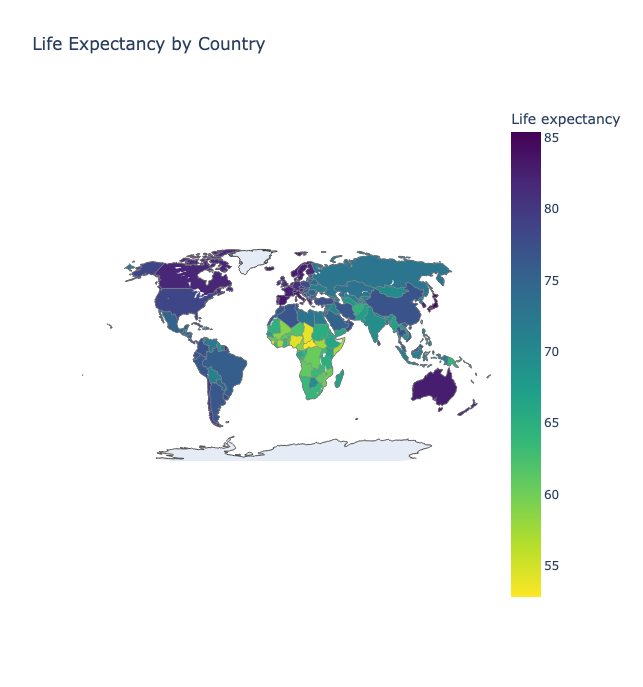

In [458]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (12).png') 

## Narrowing down specific countries to conduct further EDA 

- Target is now to look for liveable cities
- we will focus on countries with higher life expectancy 

In [126]:
#Checking the correlation efficients between life expectancy and other categories in the 'World' dataset
#the idea is that the stronger correlation coefficients influence our life expectancy more 
#thus they are the areas we should prioritise in EDA

import pandas as pd
import numpy as np 
# Select only float64 columns
float_columns = df_filled.select_dtypes(include=[np.float64])

# Find correlation coefficients between 'Life Expectancy' and float64 columns
life_expectancy_corr = float_columns.corr()['Life expectancy'].abs().sort_values(ascending=False)

print(life_expectancy_corr)

Life expectancy                              1.000000
Infant mortality                             0.918126
Birth Rate                                   0.867507
Fertility Rate                               0.846445
Maternal mortality ratio                     0.818448
Gross tertiary education enrollment (%)      0.714983
Physicians per thousand                      0.676769
Minimum wage ($)                             0.480282
Latitude                                     0.461138
Tax revenue (%)                              0.342315
Out of pocket health expenditure (%)         0.317506
Agricultural Land( %)                        0.240095
Gasoline Price ($)                           0.236204
Total tax rate (%)                           0.184862
CPI                                          0.176028
GDP ($)                                      0.174424
Population: Labor force participation (%)    0.151968
CPI Change (%)                               0.144924
Co2-Emissions               

In [266]:
#Infant mortality has the highest correlation coefficient rate
#Plotting a sliding line graph comparing life expectancy to infant mortality (strongest correlation coefficient)

import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

# Create the line plot
fig = go.Figure(data=go.Scatter(
    x=df_filled['Life expectancy'],
    y=df_filled['Infant mortality'],
    mode='lines+markers',
    hovertemplate='Country: %{text}<br><extra></extra>', 
    text = df_filled['Country']
))

# Set the layout for the plot
layout = go.Layout(
    width=800,
    height=450,
    title='Life expectancy vs Infant Mortality rates',
    xaxis=dict(title='Life expectancy'),
    yaxis=dict(title='Infant mortality'),
    sliders=[{
        'currentvalue': {'visible': False},
        'steps': [{'label': str(i), 'method': 'update', 'args': [{'visible': [True if j <= i else False for j in range(len(df_sorted))]}]} for i in range(len(df_sorted))],
        'active': 0
    }]
)

fig.update_layout(layout)

# Save the plot as an HTML file
pyo.plot(fig, filename='plot.html')

'plot.html'

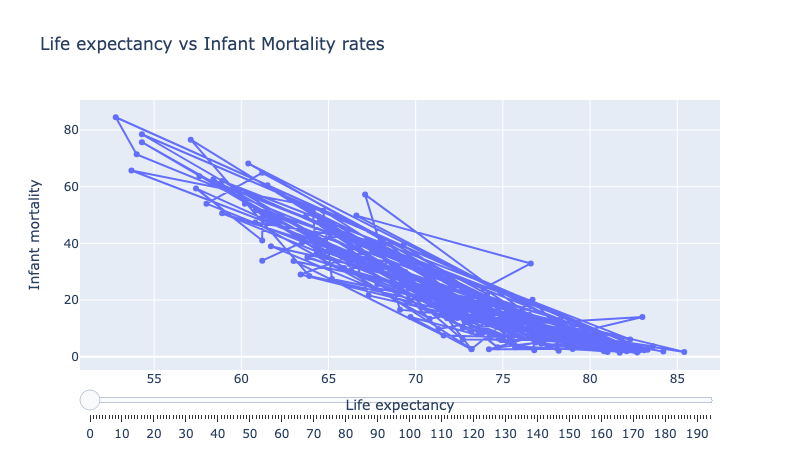

In [267]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (3).png') 

In [263]:
#plotting for the top 30 countries with the highest life expectancy and lowest infant mortality 

import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

df_sorted = df_filled.sort_values(by=['Infant mortality', 'Life expectancy'], ascending=[True, False])

# Get the DataFrame rows for the top 30 countries
top_30_countries = df_sorted.head(30)

# Create the line plot
fig = go.Figure(data=go.Scatter(
    x=top_30_countries['Life expectancy'],
    y=top_30_countries['Infant mortality'],
    mode='lines+markers',
    hovertemplate='Country: %{text}<br><extra></extra>',
    text=top_30_countries['Country']
))

# Set the layout for the plot
layout = go.Layout(
    width=800,
    height=450,
    title='Life Expectancy vs Infant Mortality Rates (Top 30 Countries)',
    xaxis=dbict(title='Life Expectancy'),
    yaxis=dict(title='Infant Mortality')
)

fig.update_layout(layout)

# Save the plot as an HTML file
pyo.plot(fig, filename='plot.html')

'plot.html'

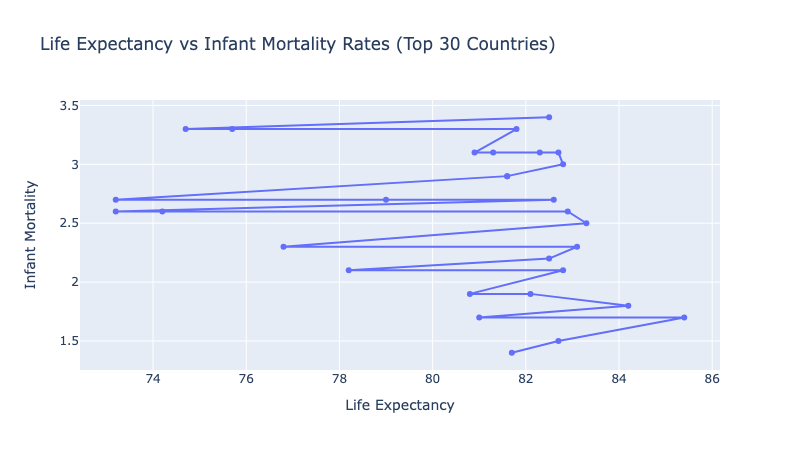

In [264]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (2).png') 

In [295]:
#created a new dataframe for the top 30 countries for narrowed EDA focus 
top_30_countries.head(30)

,Country,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price ($),GDP ($),Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage ($),Official language,Out of pocket health expenditure (%),Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate (%),Unemployment rate (%),Urban_population,Latitude,Longitude
59,Finland,18,7.5,338145.0,25000.0,8.60,45871.0,112.33,1.0,EUR,1.410,73.1,1.45,2.687612e+11,100.20,88.2,1.4,81.7,3.0,1.045,Swedish,19.9,3.81,5520314.0,59.10,20.8,36.6,6.59,4716888.0,61.924110,25.748151
76,Iceland,3,18.7,103000.0,0.0,12.00,2065.0,129.00,3.0,ISK,1.710,0.5,1.69,2.418804e+10,100.40,71.8,1.5,82.7,4.0,1.045,Icelandic,17.0,4.08,361313.0,75.00,23.3,31.9,2.84,339110.0,64.963051,-19.020835
149,San Marino,566,16.7,61.0,31000.0,6.80,12303.0,110.63,1.0,EUR,1.260,0.0,0.98,1.637931e+09,108.10,42.5,1.7,85.4,53.0,1.045,Italian,18.3,6.11,33860.0,62.45,18.1,36.2,5.36,32969.0,43.942360,12.457777
158,Slovenia,103,30.7,20273.0,7000.0,9.40,12633.0,111.05,1.6,EUR,1.600,62.0,1.32,5.374216e+10,100.40,78.6,1.7,81.0,7.0,5.250,Slovene language,12.5,3.09,2087946.0,58.40,18.6,31.0,4.20,1144654.0,46.151241,14.995463
85,Japan,347,12.3,377944.0,261000.0,7.40,1135886.0,105.48,0.5,NaN,1.420,68.5,1.06,5.081770e+12,98.80,63.2,1.8,84.2,5.0,6.770,NaN,13.1,2.41,126226568.0,61.70,11.9,46.7,2.29,115782416.0,36.204824,138.252924
100,Luxembourg,242,53.7,2586.0,2000.0,10.30,8988.0,115.09,1.7,EUR,1.370,35.7,1.19,7.110492e+10,102.30,19.2,1.9,82.1,5.0,13.050,Luxembourgish,10.6,3.01,645397.0,59.30,26.5,20.4,5.36,565488.0,49.815273,6.129583
43,Cyprus,131,12.2,9251.0,16000.0,10.46,6626.0,102.51,0.3,EUR,1.330,18.7,1.23,2.456465e+10,99.30,75.9,1.9,80.8,6.0,1.045,Greek,43.9,1.95,1198575.0,63.10,24.5,22.4,7.27,800708.0,35.126413,33.429859
129,Norway,15,2.7,323802.0,23000.0,10.40,41023.0,120.27,2.2,NOK,1.560,33.2,1.78,4.033364e+11,100.30,82.0,2.1,82.8,2.0,1.045,Norwegian,14.3,2.92,5347896.0,63.80,23.9,36.2,3.35,4418218.0,60.472024,8.468946
55,Estonia,31,23.1,45228.0,6000.0,10.90,16590.0,122.14,2.3,EUR,1.590,51.3,1.14,3.138695e+10,97.20,69.6,2.1,78.2,9.0,3.140,Estonian,22.8,4.48,1331824.0,63.60,20.9,47.8,5.11,916024.0,58.595272,25.013607
168,Sweden,25,7.4,450295.0,30000.0,11.40,43252.0,110.51,1.8,SEK,1.760,68.9,1.42,5.308329e+11,126.60,67.0,2.2,82.5,4.0,1.045,Swedish,15.2,3.98,10285453.0,64.60,27.9,49.1,6.48,9021165.0,60.128161,18.643501


## Observing more trends in our narrowed down list of 30 countries 

Education
- Tertiary education enrollment (which also had a relatively high correlation coefficient)

In [271]:
import plotly.graph_objs as go
import plotly.offline as offline

# Create the bar graph
data = [go.Bar(
    x=top_30_countries['Country'],
    y=top_30_countries['Gross tertiary education enrollment (%)'],
    marker=dict(
        color='blue'
    )
)]

# Define layout
layout = go.Layout(
    title='Gross Tertiary Education Enrollment (%) by Country',
    xaxis=dict(
        title='Country'
    ),
    yaxis=dict(
        title='Gross Tertiary Education Enrollment (%)'
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Save the figure as an HTML file
offline.plot(fig, filename='education_enrollment.html', auto_open=True)

'education_enrollment.html'

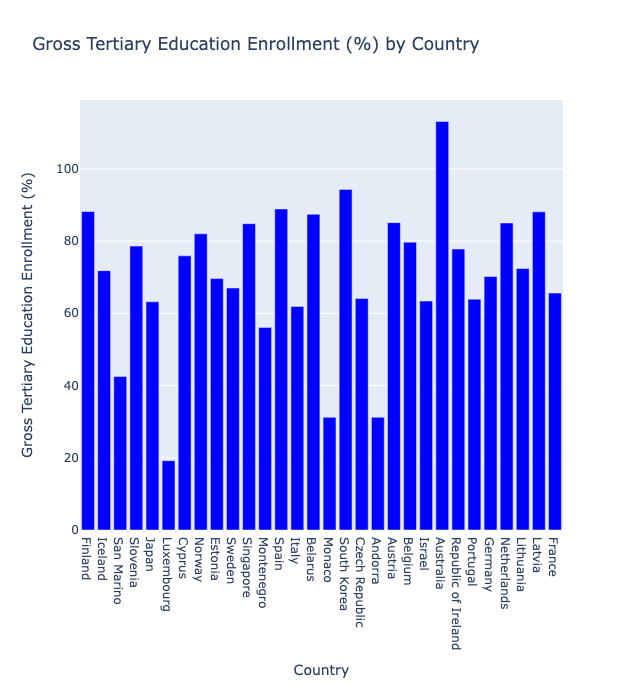

In [272]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (4).png') 

Evaluation: why the gross enrollment rates are mostly over 100%

“Gross” enrollment includes students of all ages. In other words, it includes students whose age exceeds the official age group (e.g. repeaters). Thus, if there is late enrollment, early enrollment, or repetition, the total enrollment can exceed the population of the age group that officially corresponds to the level of education – leading to ratios greater than 100 percent

“Net” enrollment includes only children of the official school age, as defined by the national education system. Small discrepancies in the reported age of children may occasionally cause net enrollment rates to exceed 100 percent.

Since the net enrollment rate excludes overage and underage students, it more accurately captures education system’s coverage and internal efficiency than gross enrollment ratio. However, it is useful to see differences between the gross enrollment ratio and the net enrollment rate for capturing the incidence of overage and underage enrollments.

Medical
- Physicians per thousand                      0.676769
- Out of pocket health expenditure (%)         0.317506

In [286]:
import plotly.graph_objs as go
import plotly.offline as offline

# Sort the DataFrame by 'Out of pocket health expenditure (%)' in ascending order
df_sorted = top_30_countries.sort_values('Out of pocket health expenditure (%)')

# Create the scatter plot
trace = go.Scatter(
    x=df_sorted['Physicians per thousand'],
    y=df_sorted['Out of pocket health expenditure (%)'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue'
    ),
    text=df_sorted['Country']
)

# Define layout
layout = go.Layout(
    title='Physicians per thousand vs Out of pocket health expenditure (%)',
    xaxis=dict(
        title='Physicians per thousand'
    ),
    yaxis=dict(
        title='Out of pocket health expenditure (%)'
    )
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Save the figure as an HTML file
offline.plot(fig, filename='health_scatter.html', auto_open=True)

'health_scatter.html'

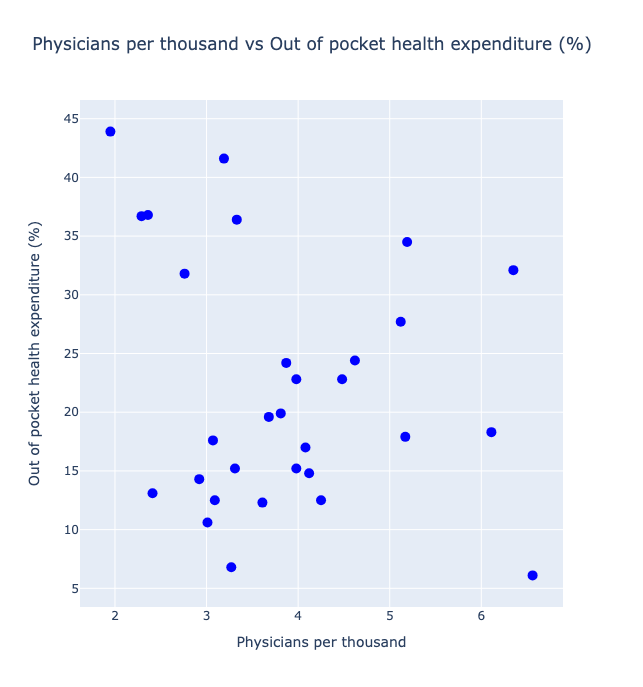

In [287]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (6).png') 

What is the most common official language among these 30 countries? 

In [296]:
import plotly.graph_objs as go
import plotly.offline as offline

# Count the occurrences of each official language
language_counts = top_30_countries['Official language'].value_counts()

# Create the pie chart
data = go.Pie(
    labels=language_counts.index,
    values=language_counts.values
)

# Define layout
layout = go.Layout(
    title='Distribution of Official Languages'
)

# Create the figure
fig = go.Figure(data=[data], layout=layout)

# Save the figure as an HTML file
offline.plot(fig, filename='language_pie_chart.html', auto_open=True)

'language_pie_chart.html'

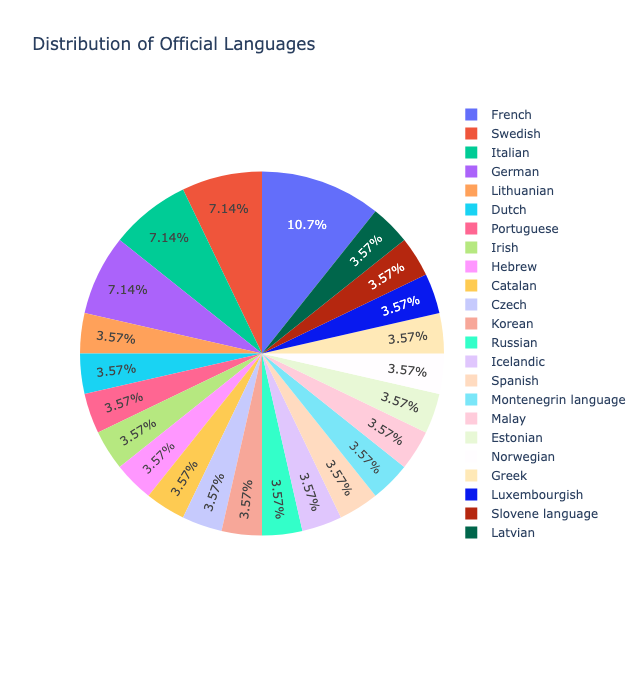

In [299]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (5).png') 

Overall, the most common language among these 30 countries is French 
Surprisingly enough, there's no English language mentioned in the piechart.
Closer examination of the top 30 countries dataframe shows that Australia has NaN value for its official language, though it may be English in reality
There is also NaN value for Japan's official language which also distorts the results 

Let's also observe the monetary features shared by these 30 countries
- urban population / population ratio
- GDP
- Minimum wage ($)

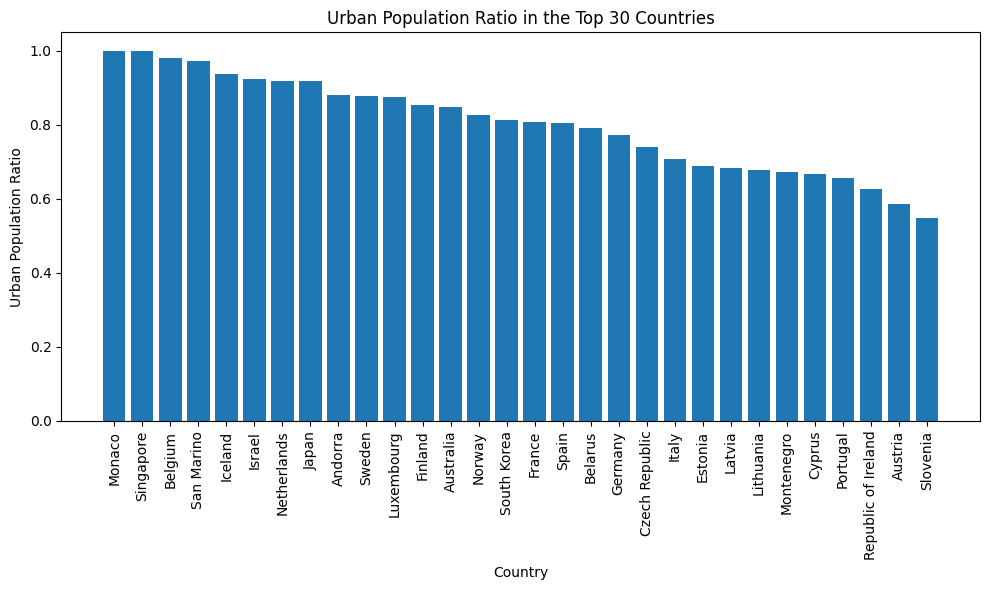

In [306]:
import matplotlib.pyplot as plt

# Calculate the urban population ratio
top_30_countries['Urban Population Ratio'] = top_30_countries['Urban_population'] / top_30_countries['Population']

# Sort the DataFrame by the urban population ratio in descending order
sorted_df = top_30_countries.sort_values(by='Urban Population Ratio', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Country'], sorted_df['Urban Population Ratio'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Urban Population Ratio')
plt.title('Urban Population Ratio in the Top 30 Countries')
plt.tight_layout()

# Display the chart
plt.show()

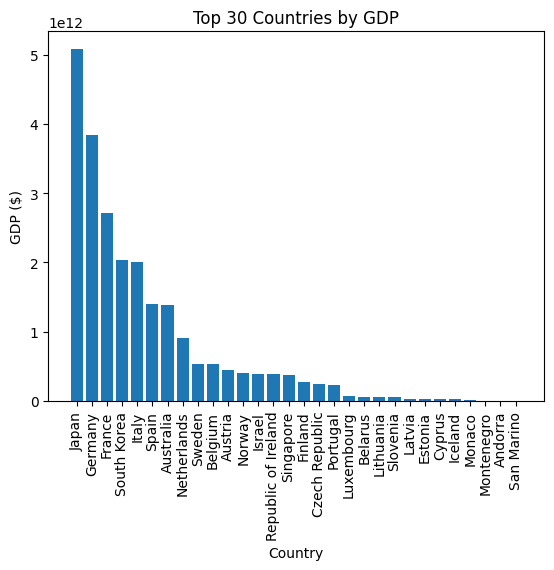

In [313]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'top_30_countries' with columns "GDP ($)" and "Country"

# Sort the DataFrame by GDP in descending order
sorted_df = top_30_countries.sort_values("GDP ($)", ascending=False)

# Extract the GDP values and country names
gdp_values = sorted_df["GDP ($)"]
countries = sorted_df["Country"]

# Create the bar plot
plt.bar(countries, gdp_values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel("Country")
plt.ylabel("GDP ($)")
plt.title("Top 30 Countries by GDP")

# Display the plot
plt.show()

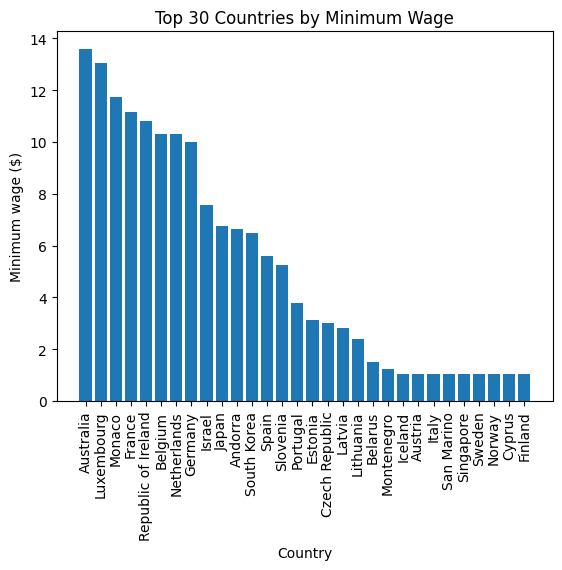

In [314]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Minimum wage in descending order
sorted_df = top_30_countries.sort_values("Minimum wage ($)", ascending=False)

# Extract the Minimum wage values and country names
min_wage_values = sorted_df["Minimum wage ($)"]
countries = sorted_df["Country"]

# Create the bar plot
plt.bar(countries, min_wage_values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel("Country")
plt.ylabel("Minimum wage ($)")
plt.title("Top 30 Countries by Minimum Wage")

# Display the plot
plt.show()

Overlapping some factors: 
- Gross tertiary education enrollment (%) does it have a correlation with Population: Labor force participation (%)? 

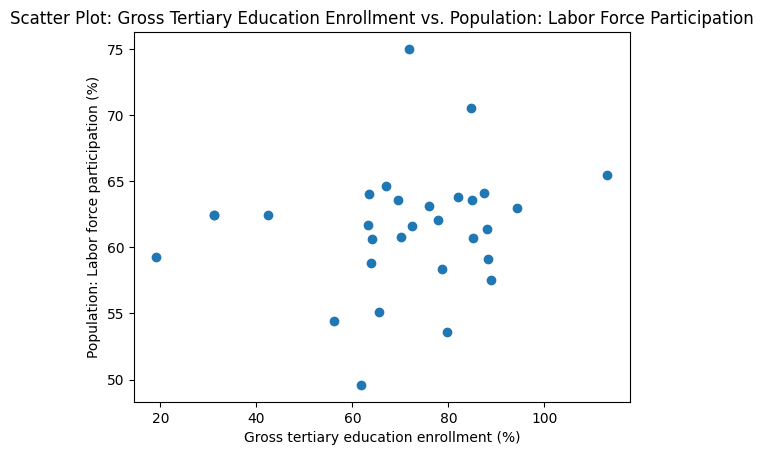

In [316]:
import matplotlib.pyplot as plt
# Extract the columns for the scatter plot
x = top_30_countries["Gross tertiary education enrollment (%)"]
y = top_30_countries["Population: Labor force participation (%)"]

# Create the scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel("Gross tertiary education enrollment (%)")
plt.ylabel("Population: Labor force participation (%)")
plt.title("Scatter Plot: Gross Tertiary Education Enrollment vs. Population: Labor Force Participation")

# Display the plot
plt.show()

there doesn't seem to be a strong correlation. 

# Conclusion / Evaluation

The purpose of my EDA was to look for liveable cities based on various criteria 

The target audience for the EDA is young adults looking for a country they could build a career / settle down in. 

I assumed that highest life expectancy and low infant mortality rates would improve quality of life. 
Among the top 30 countries who met both criteria, I examined their tertiary education levels, medical support & expenditure, and also some economic metrics. 
I also looked at the language breakdown to see what official languages you would need to learn to live comfortably in those countries. 
- French seems to be the most common language among these countries
- If I had to explore this dataset further, I would look into why English-speaking countries weren't included in the top 30 for highest life expectancy and lowest infant mortality rate. 

# Q2 

B) Application for Data Scientist at Mox Bank 

## Task 1 
- Show us how you would structure the datasets of customer and transactional events (and why)
-  Show us how you would name the variables and tables (and why)
-  explore the data in detail using the client
-  walk us through what you’ve built, and tell us what type of patterns have you observed within the data (including any anti-patterns or issues)

In [319]:
import json 
import pandas as pd

df_customer = pd.read_json('/Users/joycechung/Downloads/mox_technical_assessment/customer-events.json')

df_customer.head()

,customerId,payload
0,0f934b23c3acfb014542f4fecf7b3d7e,"{'detail': {'age': 24, 'salary': '16406', 'gen..."
1,36ae52212c1baaea8c15ad4175e427bd,"{'detail': {'age': 29, 'salary': '19040', 'gen..."
2,1da5dab587768c39574b9a398f8dee43,"{'detail': {'age': 27, 'salary': '21087', 'gen..."
3,033973a9a5427ab09f3a3ee15980f386,"{'detail': {'age': 40, 'salary': '49111', 'gen..."
4,f9ff8bd5263167078e5846c250232531,"{'detail': {'age': 41, 'salary': '43777', 'gen..."


### Data Cleaning 

In [320]:
#Splitting "payload" column into 3 sub-values: age, salary and gender. 
df_customer[['Age', 'Salary', 'Gender']] = df_customer['payload'].apply(lambda x: pd.Series(x['detail']))

# Dropping the original 'payload' column
df_customer.drop('payload', axis=1, inplace=True)

In [321]:
# View the updated DataFrame
df_customer.head()

,customerId,Age,Salary,Gender
0,0f934b23c3acfb014542f4fecf7b3d7e,24,16406,female
1,36ae52212c1baaea8c15ad4175e427bd,29,19040,male
2,1da5dab587768c39574b9a398f8dee43,27,21087,female
3,033973a9a5427ab09f3a3ee15980f386,40,49111,female
4,f9ff8bd5263167078e5846c250232531,41,43777,female


In [322]:
import json 
import pandas as pd

df_transaction = pd.read_json('/Users/joycechung/Downloads/mox_technical_assessment/transaction-events.json')

df_transaction.head()

,customerId,timestamp,payload
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,{'description': 'WELLCOME 370 (Grocery Stores...
1,b31e6e16d9f0cc4d1627621bbc4731c7,2019-01-01 01:00:12,{'description': 'STORMIES (Eating Places and R...
2,a9f5dfdbfb2285bfd508e862e30087b3,2019-01-01 01:00:16,"{'description': ' (rent)', 'transaction': {'am..."
3,fa159acecc4c559601c9a2fc35c75213,2019-01-01 01:00:25,{'description': 'A-1 BAKERY (Eating Places and...
4,8f2ad6912837fe09c3870459f699d6f9,2019-01-01 01:00:43,"{'description': ' (rent)', 'transaction': {'am..."


In [323]:
df_transaction[['Description', 'Amount', 'Currency']] = df_transaction['payload'].apply(lambda x: pd.Series([x['description'], x['transaction']['amount'], x['transaction']['currency']]))

In [324]:
df_transaction.drop('payload', axis=1, inplace=True)

In [325]:
df_transaction.head()

,customerId,timestamp,Description,Amount,Currency
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,WELLCOME 370 (Grocery Stores and Supermarkets),95.9,HKD
1,b31e6e16d9f0cc4d1627621bbc4731c7,2019-01-01 01:00:12,STORMIES (Eating Places and Restaurants),485.6,HKD
2,a9f5dfdbfb2285bfd508e862e30087b3,2019-01-01 01:00:16,(rent),13531.8,HKD
3,fa159acecc4c559601c9a2fc35c75213,2019-01-01 01:00:25,A-1 BAKERY (Eating Places and Restaurants),456.6,HKD
4,8f2ad6912837fe09c3870459f699d6f9,2019-01-01 01:00:43,(rent),10274.0,USD


In [326]:
import pandas as pd
# Extract the last value inside parentheses from the "Description" column and store it in a new column called "Type"
df_transaction['Type'] = df_transaction['Description'].str.extract(r'\(([^()]+)\)[^()]*$')
#has to be the last value inside parentheses only, because some descriptions have multiple parentheses. eg. "AEON (KORNHILL STORE)". 

# Remove the last value within parentheses from the "Description" column
df_transaction['Description'] = df_transaction['Description'].str.replace(r'\s*\([^()]+\)$', '', regex=True)

In [327]:
df_transaction

,customerId,timestamp,Description,Amount,Currency,Type
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,WELLCOME 370,95.9,HKD,Grocery Stores and Supermarkets
1,b31e6e16d9f0cc4d1627621bbc4731c7,2019-01-01 01:00:12,STORMIES,485.6,HKD,Eating Places and Restaurants
2,a9f5dfdbfb2285bfd508e862e30087b3,2019-01-01 01:00:16,,13531.8,HKD,rent
3,fa159acecc4c559601c9a2fc35c75213,2019-01-01 01:00:25,A-1 BAKERY,456.6,HKD,Eating Places and Restaurants
4,8f2ad6912837fe09c3870459f699d6f9,2019-01-01 01:00:43,,10274.0,USD,rent
...,...,...,...,...,...,...
200400,291db767ac8b96128d048e4d7942ea4e,2019-02-01 00:58:17,CRVANGUARD SHOP 11,253.4,HKD,Grocery Stores and Supermarkets
200401,e31f24d088ca0c3424672da4d6449020,2019-02-01 00:58:26,HONG KONG EXPRESS AIRW,1892.9,HKD,Travel Agencies
200402,f9a60987372b16f7fd526d5fc677927c,2019-02-01 00:58:32,MYDRESS HOLDINGS LIMIT,1347.7,HKD,Shopping / Department Store
200403,2a3b457f69ad5ac25068064074893db8,2019-02-01 00:59:43,,12082.6,HKD,rent


In [328]:
#joining df_transaction and df_customer on "customerId"
merged_df = pd.merge(df_transaction, df_customer, on="customerId", how="inner")

In [329]:
merged_df
#shows you the customers who made purchases in df_customer & have transaction records in transaction_df

,customerId,timestamp,Description,Amount,Currency,Type,Age,Salary,Gender
0,8be2e455cd42f6a50977c99eee4d4d14,2019-01-01 01:00:04,WELLCOME 370,95.9,HKD,Grocery Stores and Supermarkets,39,55922,male
1,8be2e455cd42f6a50977c99eee4d4d14,2019-01-04 18:05:59,WWW.ASOS.COM,1449.4,HKD,Shopping / Department Store,39,55922,male
2,8be2e455cd42f6a50977c99eee4d4d14,2019-01-05 12:24:23,YATA SUPERMARKET-TM,138.0,HKD,Grocery Stores and Supermarkets,39,55922,male
3,8be2e455cd42f6a50977c99eee4d4d14,2019-01-05 20:40:43,BEEF AND LIBERTY HONG KONG,591.0,HKD,Eating Places and Restaurants,39,55922,male
4,8be2e455cd42f6a50977c99eee4d4d14,2019-01-07 01:39:53,HK WING ON TRAVEL SERVICE,4167.8,HKD,Travel Agencies,39,55922,male
...,...,...,...,...,...,...,...,...,...
200400,48f80b634fc8d3d9ec00cb9f04956a6d,2019-01-31 16:48:55,,12328.9,HKD,other,22,14114,male
200401,643dc432cd40e2304d2817138474a1e2,2019-01-31 17:32:25,,10479.4,HKD,other,24,11643,female
200402,6e3197aae95c2ff8fcab35cb730f6a86,2019-01-31 19:23:46,,2531.0,HKD,other,17,0,male
200403,59186584039c18248c1c4244e7305050,2019-01-31 21:13:32,,7225.5,HKD,other,19,0,male


In [419]:
#removing negative values from the dataset in transaction amount and salary 

import pandas as pd

# Remove rows with negative salary
merged_df = merged_df[merged_df['Salary'] >= 0]

# Remove rows with negative transaction amounts
merged_df = merged_df[merged_df['Amount'] >= 0]


In [330]:
#Customers often make multiple transactions in Mox Bank 
#sorting the values for "customerId" in merged dataframe so we can group together transactions made by the same people. 
merged_df.sort_values(by="customerId", inplace=True)

In [420]:
merged_df

,customerId,timestamp,Description,Amount,Currency,Type,Age,Salary,Gender,hour,time_gap,Time Gap,average time gap,average spending
96986,00003e3b9e5336685200ae85d21b4f5e,2019-01-02 13:12:00,,496.4,HKD,other,15,0,female,13,NaT,0.0,402864.60,1559.820
96987,00003e3b9e5336685200ae85d21b4f5e,2019-01-17 16:51:40,BROADWAY PHOTO INSTALMEN,1382.1,HKD,Shopping / Department Store,15,0,female,16,15 days 03:39:40,1309180.0,402864.60,1559.820
96988,00003e3b9e5336685200ae85d21b4f5e,2019-01-18 01:06:29,MCDONALD'S-278-CHEUNG,1186.4,HKD,Eating Places and Restaurants,15,0,female,1,0 days 08:14:49,29689.0,402864.60,1559.820
96989,00003e3b9e5336685200ae85d21b4f5e,2019-01-24 19:41:58,ZUMA HONG KONG,679.7,HKD,Eating Places and Restaurants,15,0,female,19,6 days 18:35:29,585329.0,402864.60,1559.820
96990,00003e3b9e5336685200ae85d21b4f5e,2019-01-25 20:44:03,KING PATH LIMITED,4054.5,HKD,Travel Agencies,15,0,female,20,1 days 01:02:05,90125.0,402864.60,1559.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199891,ffffda8ada4827900cbf65fd20281080,2019-01-29 13:49:12,STORMIES,941.6,HKD,Eating Places and Restaurants,29,12056,male,13,2 days 04:21:49,188509.0,138187.00,2624.475
169809,fffffe98d0963d27015c198262d97221,2019-01-06 00:43:35,TRAVELLIKER.COM LIMITE,4517.6,HKD,Travel Agencies,21,20845,female,0,NaT,0.0,531138.75,4690.150
169810,fffffe98d0963d27015c198262d97221,2019-01-15 15:38:40,A-1 BAKERY,794.1,HKD,Eating Places and Restaurants,21,20845,female,15,9 days 14:55:05,831305.0,531138.75,4690.150
169811,fffffe98d0963d27015c198262d97221,2019-01-21 14:52:02,,10458.9,HKD,other,21,20845,female,14,5 days 23:13:22,515602.0,531138.75,4690.150


In [332]:
merged_df['Type'].unique()
#6 total categories of transaction

array(['Eating Places and Restaurants', 'other', 'Travel Agencies',
       'Shopping / Department Store', 'rent',
       'Grocery Stores and Supermarkets'], dtype=object)

In [333]:
len(merged_df['customerId'].unique())
#20000 total customers in the merged dataset

20000

In [353]:
#Converting 'Salary' into numeric data

merged_df['Salary'] = pd.to_numeric(merged_df['Salary'], errors='coerce')

In [354]:
merged_df.info()
#Salary is now int64
#Timestamp data is already in datetime format

<class 'pandas.core.frame.DataFrame'>
Index: 200405 entries, 96988 to 169809
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customerId   200405 non-null  object        
 1   timestamp    200405 non-null  datetime64[ns]
 2   Description  200405 non-null  object        
 3   Amount       200405 non-null  float64       
 4   Currency     200405 non-null  object        
 5   Type         200405 non-null  object        
 6   Age          200405 non-null  int64         
 7   Salary       200405 non-null  int64         
 8   Gender       200405 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 15.3+ MB


### Data Visualisation
- ideal to use plotly

#### Knowing our audience 

In [347]:
#Calculating the gender ratio of our customers

import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline

# Calculate the male to female customer ratio
male_count = merged_df[merged_df['Gender'] == 'male'].shape[0]
female_count = merged_df[merged_df['Gender'] == 'female'].shape[0]
total_count = male_count + female_count

# Calculate the percentage of male and female customers
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# Create a DataFrame for the gender ratio
gender_ratio_df = pd.DataFrame({'Gender': ['Male', 'Female'], 'Percentage': [male_percentage, female_percentage]})

# Create the pie chart using Plotly
data = go.Pie(labels=gender_ratio_df['Gender'], values=gender_ratio_df['Percentage'], 
              hoverinfo='label+percent', textinfo='value+percent')

# Set the chart title
layout = go.Layout(title='Male to Female Customer Ratio')

# Create the figure
fig = go.Figure(data=[data], layout=layout)

# Save the figure as a PNG file
offline.plot(fig)

'temp-plot.html'

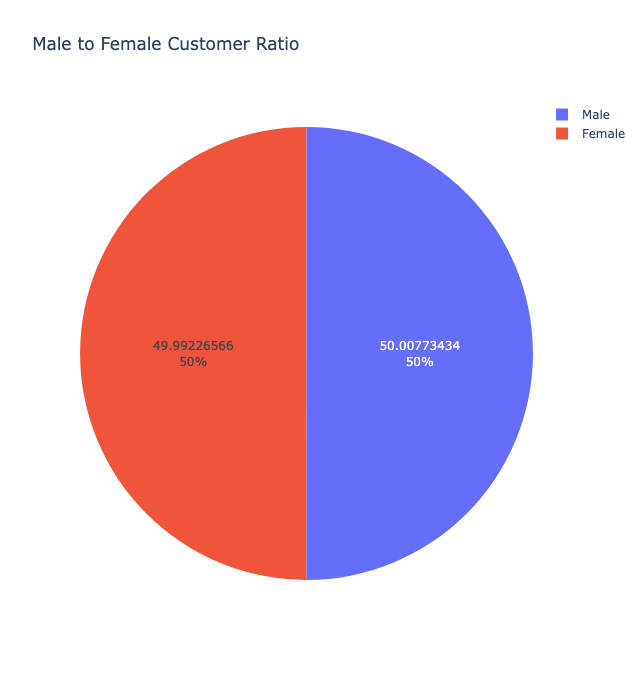

In [346]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (7).png') 

Evaluation - Very balanced gender data. Perhaps this was done deliberately to make the data more balanced across both genders? But we would need more information from Mox Bank to know this. 

In [348]:
#Age range of the customers 
import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline

# Calculate the age range
min_age = merged_df['Age'].min()
max_age = merged_df['Age'].max()

# Create the bins for the histogram or bar chart
bins = list(range(min_age, max_age + 10, 10))

# Create the histogram or bar chart
data = go.Histogram(x=merged_df['Age'], nbinsx=len(bins), xbins=dict(start=min_age, end=max_age), marker=dict(color='blue'))

# Set the chart title and labels
layout = go.Layout(title='Age Range of Customers', xaxis=dict(title='Age'), yaxis=dict(title='Count'))

# Create the figure
fig = go.Figure(data=[data], layout=layout)

# Save the figure as a PNG file
offline.plot(fig, filename='age_range.html', image='png')

'age_range.html'

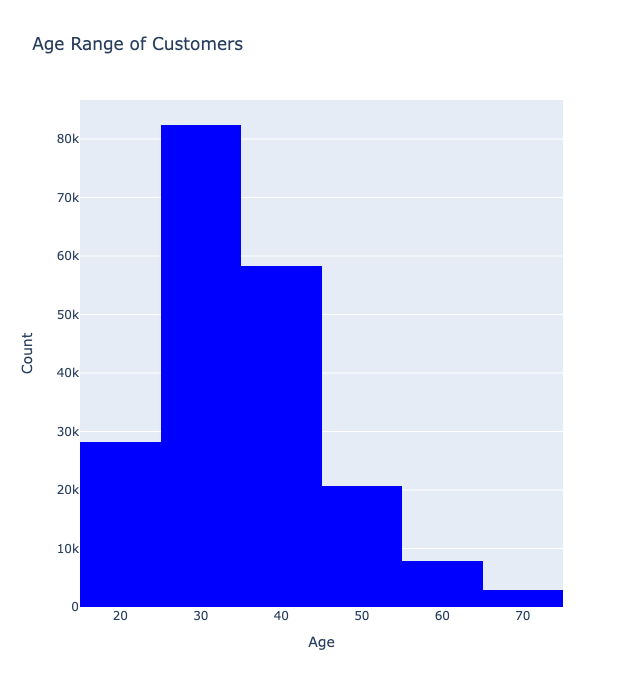

In [349]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (8).png') 

The bulk of our users are between the ages 25 to 34. Second highest category is the 35-44 age range. 

In [421]:
#Average salary range of customers

import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline

# Calculate the average salary range
average_salary_range = merged_df.groupby('customerId')['Salary'].mean()

# Create the bar chart or box plot
# data = go.Bar(x=average_salary_range.index, y=average_salary_range, marker=dict(color='blue'))
# # or, for a box plot:
data = go.Box(x=average_salary_range)

# Set the chart title and labels
layout = go.Layout(title='Average Salary Range of Customers', xaxis=dict(title='Customer'), yaxis=dict(title='Average Salary'))

# Create the figure
fig = go.Figure(data=[data], layout=layout)

# Save the figure as a PNG file
offline.plot(fig, filename='average_salary_range.html', image='png')

'average_salary_range.html'

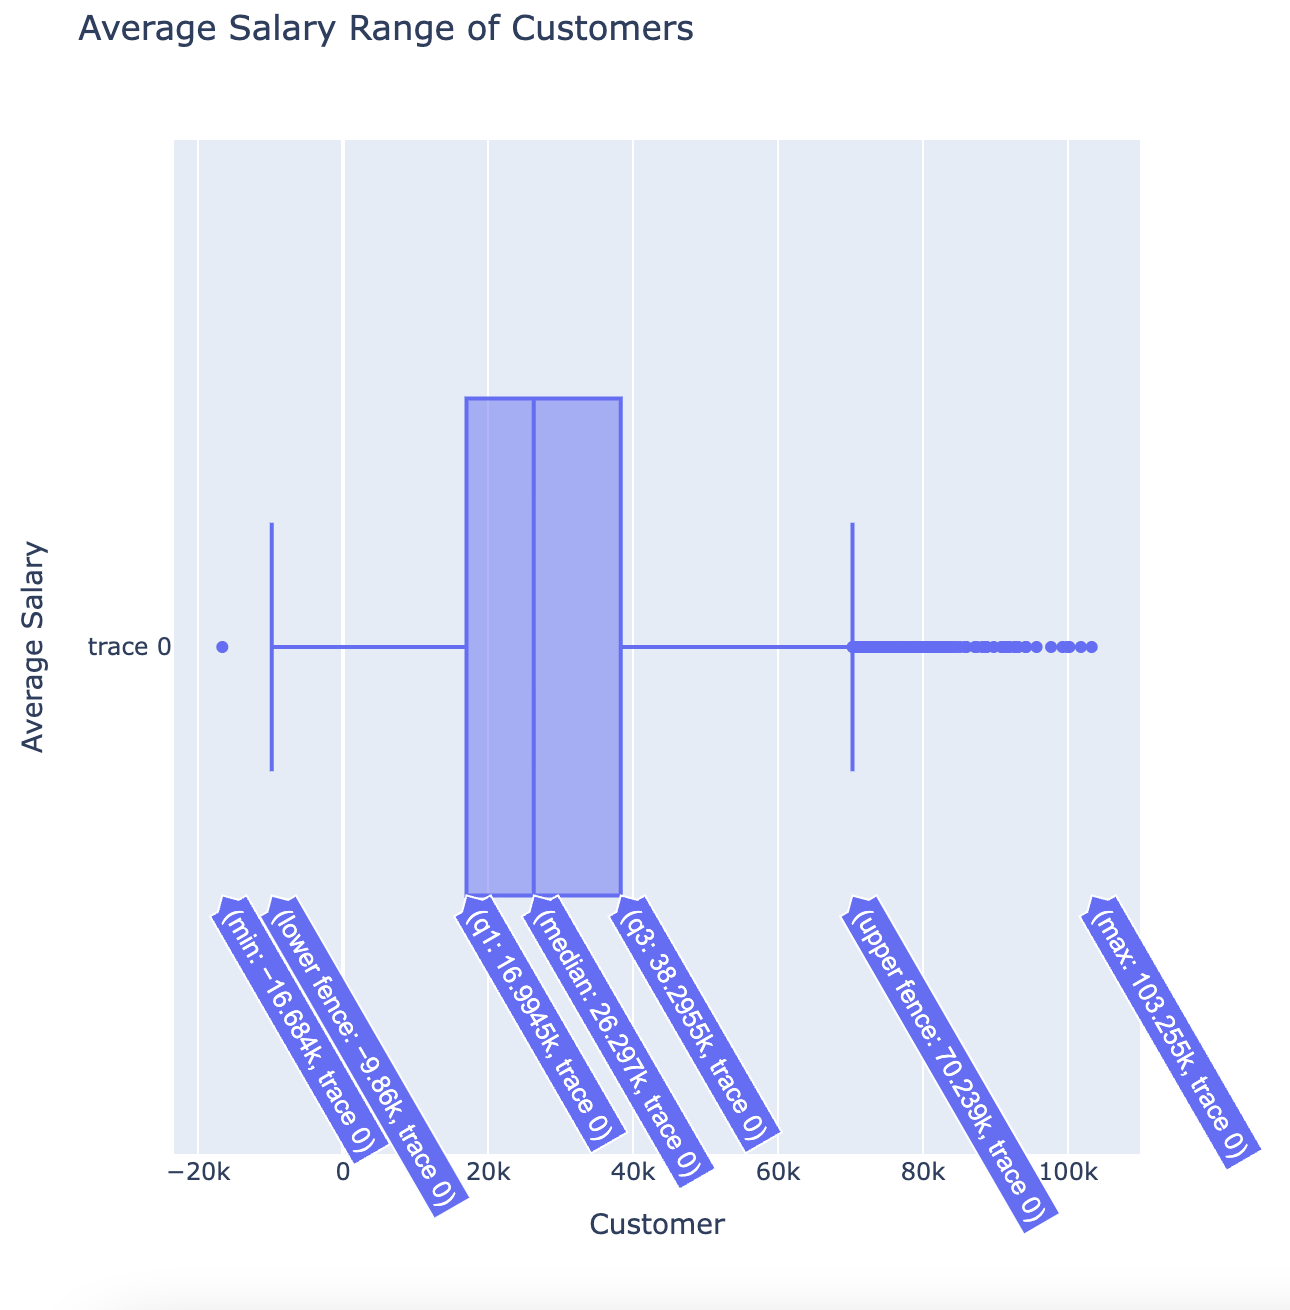

In [357]:
from IPython.display import Image
Image(filename='/Users/joycechung/Desktop/Screenshot 2024-02-05 at 4.57.45 PM.png') 

The median monthly salary of our customers is around $26k HKD. 

#### Type of transactions 

In [359]:
#most frequent type of transaction 
import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline

# Calculate the frequency of each transaction type
transaction_counts = merged_df['Type'].value_counts()

# Create the bar chart or pie chart
data = go.Bar(x=transaction_counts.index, y=transaction_counts, marker=dict(color='blue'))
# or, for a pie chart:
# data = go.Pie(labels=transaction_counts.index, values=transaction_counts)

# Set the chart title and labels
layout = go.Layout(title='Most Frequent Type of Transaction', xaxis=dict(title='Transaction Type'), yaxis=dict(title='Frequency'))

# Create the figure
fig = go.Figure(data=[data], layout=layout)

# Save the figure as a PNG file
offline.plot(fig, filename='transaction_type.html', image='png')

'transaction_type.html'

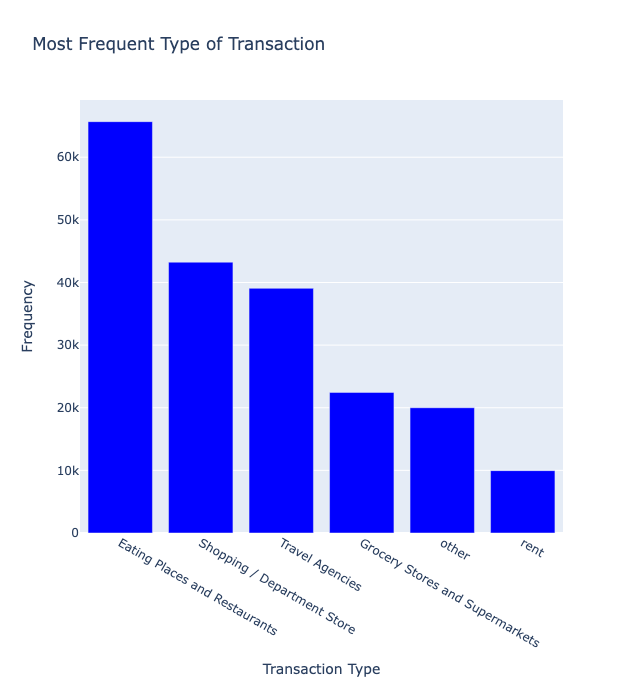

In [360]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (9).png') 

Most people use Mox Bank to make transactions at restaurants. 

In [361]:
#most frequent type of transaction grouped by Male / Female

import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline

# Calculate the frequency of each transaction type grouped by gender
transaction_counts = merged_df.groupby(['Gender', 'Type']).size().unstack()

# Create the grouped bar chart
data = []
for column in transaction_counts.columns:
    data.append(go.Bar(x=transaction_counts.index, y=transaction_counts[column], name=column))

# Set the chart title and labels
layout = go.Layout(title='Most Frequent Type of Transaction Grouped by Gender', xaxis=dict(title='Gender'), yaxis=dict(title='Frequency'))

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Save the figure as a PNG file
offline.plot(fig, filename='transaction_type_gender.html', image='png')

'transaction_type_gender.html'

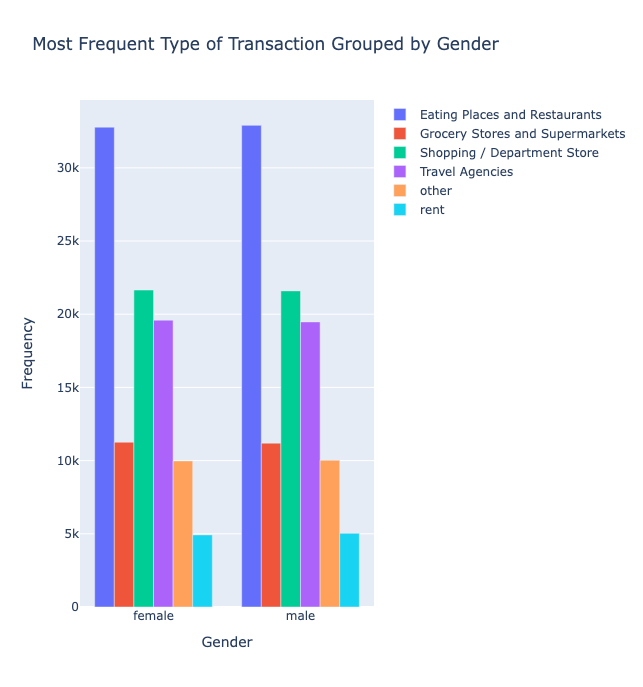

In [362]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (10).png') 

In [363]:
transaction_counts

Type,Eating Places and Restaurants,Grocery Stores and Supermarkets,Shopping / Department Store,Travel Agencies,other,rent
Gender,,,,,,
female,32779,11258,21652,19595,9977,4926
male,32902,11193,21594,19474,10023,5032


Seems like there's hardly a difference in how female and male customers shop. 
Perhaps the data hasn't been gathered to fully represent the genders properly, because it seems too identical, every single transaction type lines up. 

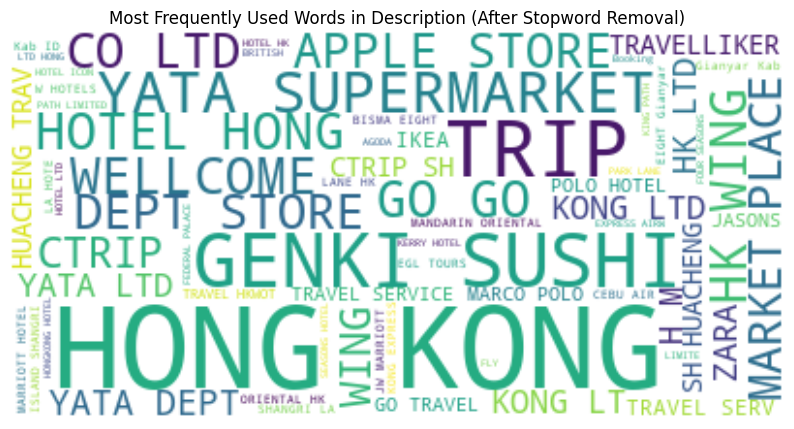

In [364]:
#most frequently used word in the "Description"
#eliminate stopwords

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the descriptions into a single string
text = ' '.join(merged_df['Description'].astype(str).tolist())

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Description (After Stopword Removal)')
plt.show()

#### Checking the time of the transactions

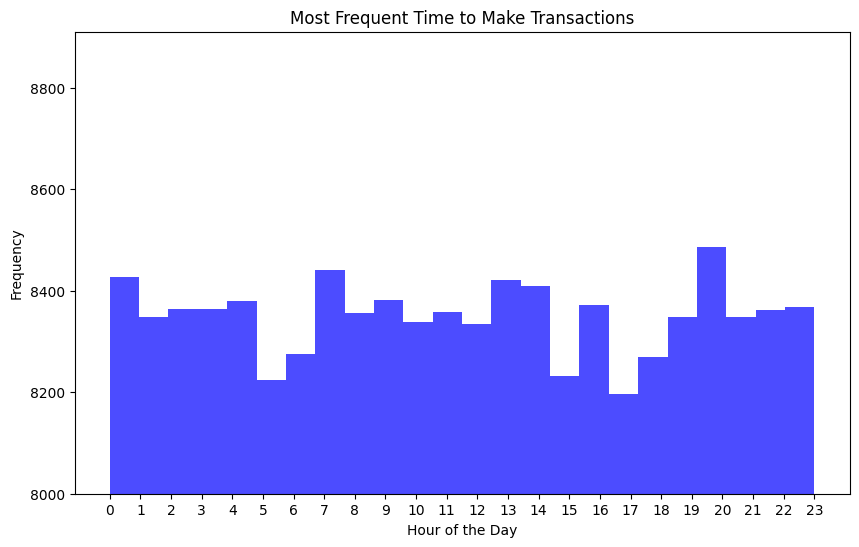

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract the hour from the timestamp column
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Create a histogram of transaction times
plt.figure(figsize=(10, 6))
merged_df['hour'].plot.hist(bins=24, alpha=0.7, color='blue')

# Set the labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Most Frequent Time to Make Transactions')

# Set the x-tick labels to represent the hour of the day
plt.xticks(range(0, 24))

# Set the minimum value of the y-axis to 8000
plt.ylim(8000, None)

# Show the plot
plt.show()

- Doesn't seem to have a significant peak hour during the morning hours.
- 5 and 6 am have the lowest frequencies, which makes sense because most people are asleep or need to get ready for work.
- There's a late afternoon spike at 4pm
- Nighttime has a spike at 8pm. 


In [377]:
#At different times of the day, which transaction types are most common?

import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline

# Extract the hour from the timestamp column
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group the data by hour and transaction type
grouped_df = merged_df.groupby(['hour', 'Type']).size().unstack()

# Create the stacked bar chart
data = []
for column in grouped_df.columns:
    data.append(go.Bar(x=grouped_df.index, y=grouped_df[column], name=column))

# Set the chart title and labels
layout = go.Layout(title='Most Common Transaction Types at Different Times of the Day',
                   xaxis=dict(title='Hour of the Day'),
                   yaxis=dict(title='Frequency'),
                   barmode='stack')

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Save the figure as an HTML file
offline.plot(fig, filename='transaction_types_by_time.html', auto_open=True)

'transaction_types_by_time.html'

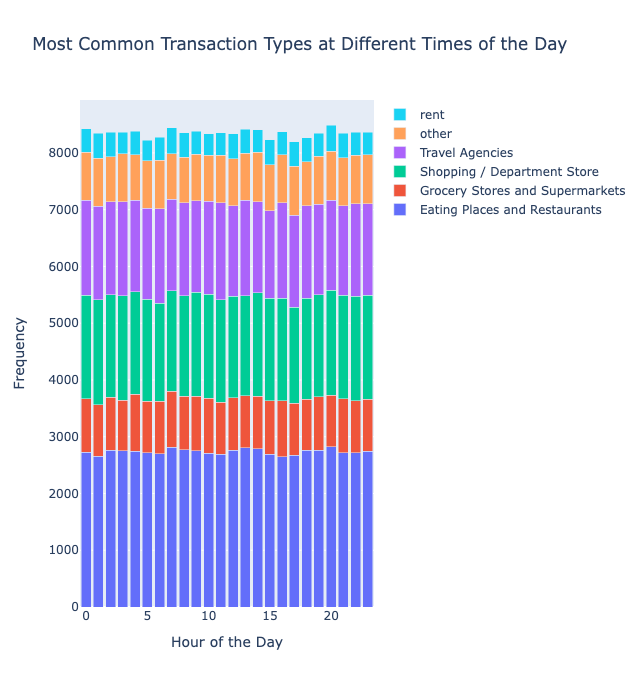

In [378]:
from IPython.display import Image
Image(filename='/Users/joycechung/Downloads/newplot (11).png') 

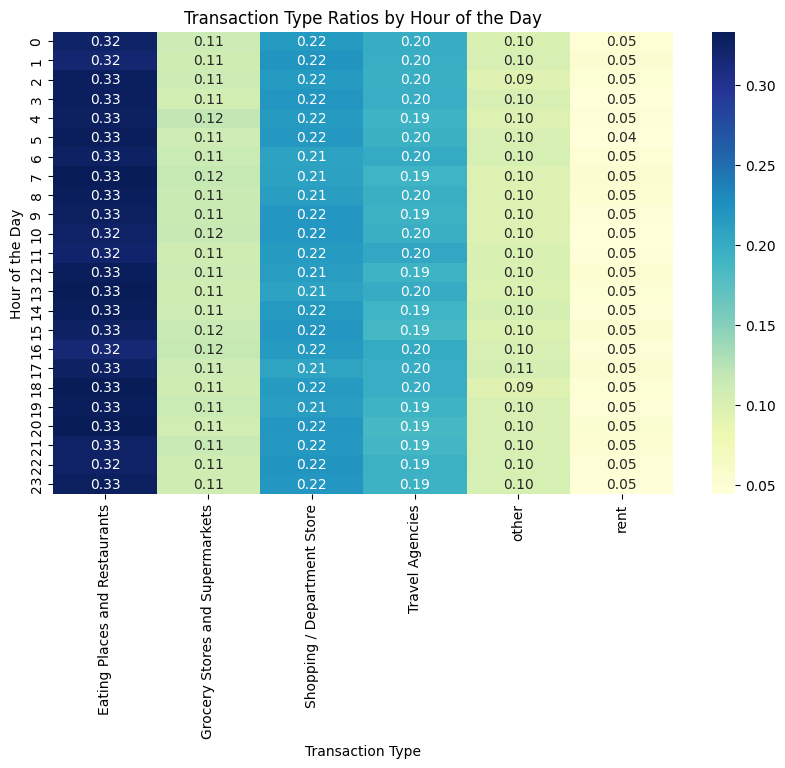

In [374]:
#creating a heatmap to explore the exact ratios of the transaction types per hour of the day

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour from the timestamp column
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Group the data by hour and transaction type and calculate the frequencies
grouped_df = merged_df.groupby(['hour', 'Type']).size().unstack()

# Calculate the proportions by normalizing the frequencies
proportions_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(proportions_df, cmap='YlGnBu', annot=True, fmt='.2f')

# Set the chart title and labels
plt.title('Transaction Type Ratios by Hour of the Day')
plt.xlabel('Transaction Type')
plt.ylabel('Hour of the Day')

# Show the plot
plt.show()

They are very consistent results. It's likely that the data collected is overly simplified or has sampling bias, or is potentially artificially generated. 

#### Focusing in on the type of transactions and customers

In [422]:
#What's the average customer's demographic (gender, age, salary) and a percentage ratio of that likelihood?  

import pandas as pd

# Calculate the average values for age and salary
average_age = merged_df['Age'].mean()
average_salary = merged_df['Salary'].mean()

# Calculate the percentage ratio for gender
gender_counts = merged_df['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

# Display the average values and percentage ratios
print("Average Age: {:.2f}".format(average_age))
print("Average Salary: {:.2f}".format(average_salary))
print("\nGender Percentage Ratio:")
print(gender_percentage)

Average Age: 34.76
Average Salary: 34367.57

Gender Percentage Ratio:
Gender
male      50.007485
female    49.992515
Name: count, dtype: float64


NB: If we use the mean, these are our results. they are slightly different from the median values (eg. median average salary is $26,000). 
Our results may have a lot of outliers, which makes the mean result quite different from the median

In [423]:
#average no. of transactions made per customer
avg_transactions_per_customer = merged_df.groupby('customerId').size().mean()

avg_transactions_per_customer 

10.023609443777511

In [424]:
import pandas as pd
# Extract the minimum and maximum timestamps from the 'timestamp' column
min_timestamp = merged_df['timestamp'].min()
max_timestamp = merged_df['timestamp'].max()

# Print the time frame
print(f"Time frame of the current data sampling: {min_timestamp} to {max_timestamp}")

Time frame of the current data sampling: 2019-01-01 01:00:04 to 2019-02-01 00:59:50


Between the time of 1 Jan 2019 to 1 Feb 2019, the average customer makes around 10 transactions with Mox. 

In [425]:
#Average time gap between transactions for an average customer

import pandas as pd

# Sort the transactions by timestamp for each customer
merged_df.sort_values(by=['customerId', 'timestamp'], inplace=True)

# Calculate the time difference between consecutive transactions for each customer
merged_df['time_gap'] = merged_df.groupby('customerId')['timestamp'].diff()

# Calculate the average time gap between transactions for an average customer
average_time_gap = merged_df['time_gap'].mean()

# Print the average time gap
print(f"Average time gap between transactions for an average customer: {average_time_gap}")

Average time gap between transactions for an average customer: 2 days 12:07:32.749855875


In [426]:
#Typical amount spent per transaction for a customer

import pandas as pd

# Calculate the average amount spent per transaction for an average customer
average_amount = merged_df['Amount'].mean()

# Print the average amount
print(f"Average amount spent for an average transaction: {average_amount}")

Average amount spent for an average transaction: 2062.7753622899118


In [428]:
import pandas as pd

# Assuming you have a pandas DataFrame called 'merged_df' with a column 'Amount'

# Find the lowest transaction amount
lowest_transaction_amount = merged_df['Amount'].min()

# Print the lowest transaction amount
print("Lowest Transaction Amount:", lowest_transaction_amount)

Lowest Transaction Amount: 0.0


In [ ]:
#for the customers with shortest time gap before transactions, what's their average spending?
# - make 'average time gap' and 'average spending' new columns in the dataframe 
# - sort the column in ascending order (customers with shortest time gaps first)

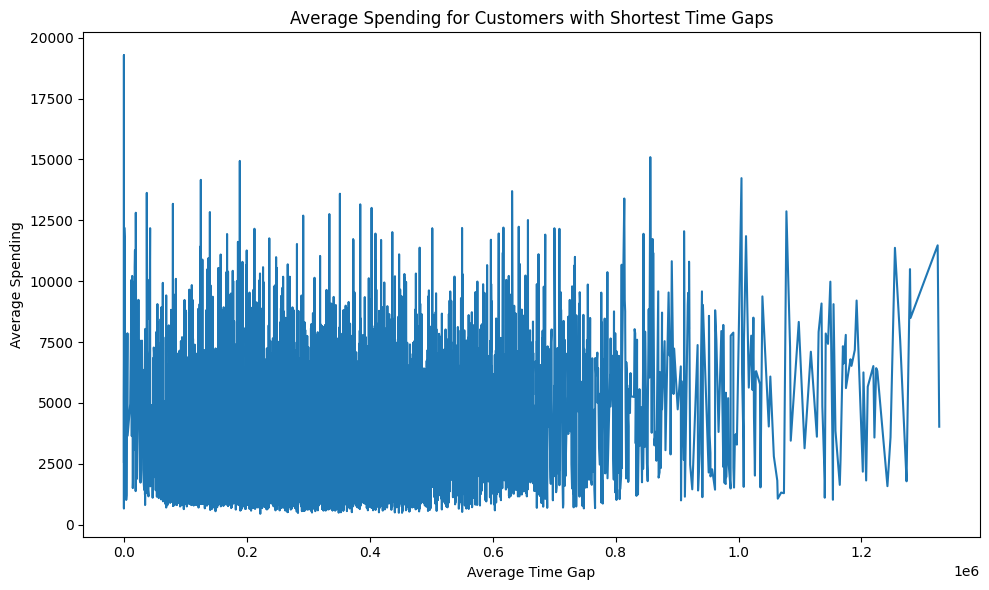

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Time Gap' to float and calculate average time gap and average spending for each customer
merged_df['Time Gap'] = merged_df.groupby('customerId')['timestamp'].diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds()
merged_df['average time gap'] = merged_df.groupby('customerId')['Time Gap'].transform('mean')
merged_df['average spending'] = merged_df.groupby('customerId')['Amount'].transform('mean')

# Sort the DataFrame by 'average time gap' in ascending order
sorted_df = merged_df.sort_values('average time gap')

# Plotting average spending for customers with shortest time gaps
plt.figure(figsize=(10, 6))
plt.plot(sorted_df['average time gap'], sorted_df['average spending'])
plt.xlabel('Average Time Gap')
plt.ylabel('Average Spending')
plt.title('Average Spending for Customers with Shortest Time Gaps')
plt.tight_layout()
plt.show()

This graph attempts to show the average amount spent by a customer where the average time gap between their transactions is longer or shorter. 

It seems that the shorter the time gap, the more amount of money is spent on that transaction. 
But we would need more data to corroborate this. 

We should also note that this just based on the average time gap and average spending, so it's just an estimate based on the average customer. It can also be affected by outliers. 

#### Assessing the most profitable type of transaction

Total Amount from Each Type of Transaction:
Type
Eating Places and Restaurants       53333391.1
Grocery Stores and Supermarkets      5134805.6
Shopping / Department Store         45342883.5
Travel Agencies                    128333823.9
other                               67808631.6
rent                               113410144.7
Name: Amount, dtype: float64


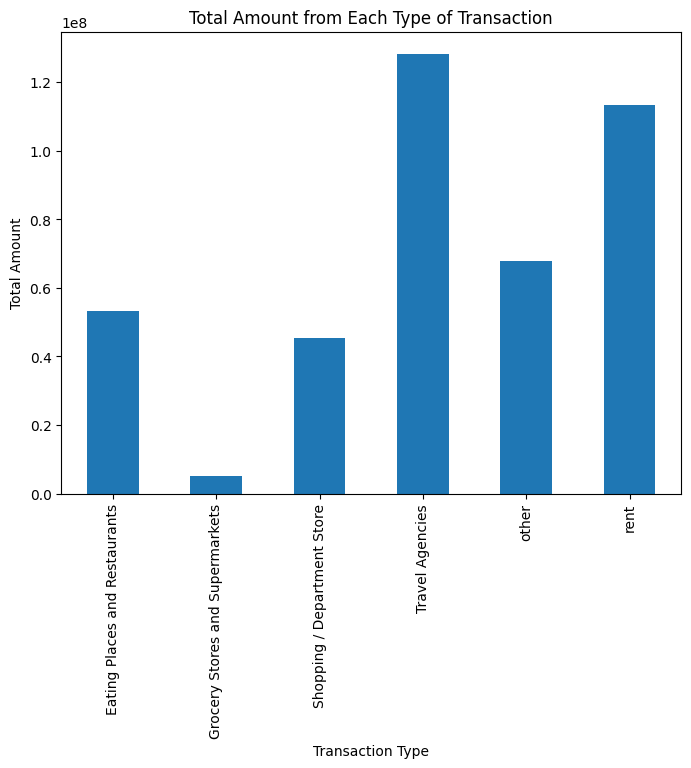

In [435]:
#does the popularity of a particular transaction (the total no. of times it's being transacted) trump expensive transactions? 

#a) overall, how much money has Mox bank made from each type of transaction? 
import pandas as pd

# Calculate the total amount of money from each type of transaction
transaction_type_total = merged_df.groupby('Type')['Amount'].sum()

# Display the results
print("Total Amount from Each Type of Transaction:")
print(transaction_type_total)

# Plot the results
transaction_type_total.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.title('Total Amount from Each Type of Transaction')
plt.show()

In [436]:
#b) #of the top 10 most expensive transactions, what type of transaction are they?

# Sort the DataFrame by 'Amount' column in descending order
sorted_transactions = merged_df.sort_values('Amount', ascending=False)

# Select the top 10 most expensive transactions
top_10_expensive_transactions = sorted_transactions.head(10)['Type']

# Display the result
print("Type of Transaction for the Top 10 Most Expensive Transactions:")
print(top_10_expensive_transactions)

Type of Transaction for the Top 10 Most Expensive Transactions:
186751     rent
90848      rent
103304     rent
143537     rent
80080      rent
78406     other
98739      rent
76448      rent
160485     rent
183903     rent
Name: Type, dtype: object


Not a lot of people use Mox Bank to pay their rent, but when they do, they spend a lot of money on their transaction. 
Perhaps we can find a way to encourage people to pay their rent using Mox Bank. 

In [ ]:
#top 10 most valued qcustomers (by total no. of transactions made // spent the most money ^ see answer to previous question first)
#of these top 10, what's their average salary, what's their gender, what time do they make transactions, which type of transaction is most popular, what's the keyword in the description? 

import pandas as pd

# Calculate the total number of transactions made by each customer
customer_transaction_count = merged_df['customerId'].value_counts()

# Calculate the total amount of money spent by each customer
customer_total_spending = merged_df.groupby('customerId')['Amount'].sum()

# Get the top 10 customers based on the total number of transactions made
top_10_customers_by_transaction_count = customer_transaction_count.head(10)

# Get the top 10 customers based on the total amount of money spent
top_10_customers_by_spending = customer_total_spending.head(10)

In [438]:
# Display the top 10 customers by transaction count
print("Top 10 Customers by Transaction Count:")
print(top_10_customers_by_transaction_count)

import pandas as pd

# Assuming you have a pandas DataFrame called 'merged_df' with columns 'CustomerId' and 'Amount'

# Calculate the total amount spent by each customer
customer_total_spending = merged_df.groupby('customerId')['Amount'].sum()

# Get the top 10 customers based on transaction count
top_10_customers_by_transaction_count = merged_df['customerId'].value_counts().head(10).index

# Calculate the total amount spent by the top 10 customers
total_spent_by_top_10 = customer_total_spending.loc[top_10_customers_by_transaction_count].sum()

# Display the total amount spent by the top 10 customers
print("Total Amount Spent by Top 10 Customers by Transaction Count:")
print(total_spent_by_top_10)

Top 10 Customers by Transaction Count:
customerId
7bae3e93d8118c9e173bd5bde6604d5e    48
77268f3a372a5dd9784e4eef5b65375b    48
dcafe179edb6e6db70237855954aaa16    43
7d69a0863dd9d2ffd5496820191b7f85    42
e31f24d088ca0c3424672da4d6449020    41
6bc19ff88209138438426e7a03d715fa    41
3a0ab6b2850281304b9641cb5650ccc0    40
1cf584900f5ac45fdf7602a255b5e4af    40
2326047660103b190f81a37a84a6b8b3    40
919e3efa7dff874ae055ac10594a5d1b    40
Name: count, dtype: int64
Total Amount Spent by Top 10 Customers by Transaction Count:
491383.6


In [440]:
# Display the top 10 customers by spending
print("\nTop 10 Customers by Spending:")
print(top_10_customers_by_spending)

# Calculate the total amount spent by the top 10 customers
total_spent_by_top_10 = top_10_customers_by_spending.sum()

# Display the total amount spent by the top 10 customers
print("Total Amount Spent by Top 10 Customers by Spending:")
print(total_spent_by_top_10)


Top 10 Customers by Spending:
customerId
00003e3b9e5336685200ae85d21b4f5e     7799.1
00019d812c1173c8a69c656a40fa8767    40281.9
000a8e84b013655b832041a6f362e5c9    19036.1
000ce057cbe52e106e611787acb238c8    38852.6
000d0c74074191add6f22e0004db8f76     7310.6
000d54aadcedee0739d39127955f2cdb    25740.4
000db175d712996f1cfd20cc7d600223    21450.7
0016b0727ad8f224cfd7053b56ff2720    21837.9
001c728a3046207c685f7f478f4bb41b     2053.2
001daccace8a4c60f8437aa5ff8f9cf1    24790.3
Name: Amount, dtype: float64
Total Amount Spent by Top 10 Customers by Spending:
209152.8


The top 10 most regular customers are more profitable than the top 10 customers who have made the most expensive transactions with Mox. 

Mox Bank is currently profiting the most from people who are making frequent transactions.
They don't have to be the most expensive.

It seems that as long as people make regular transactions, they will be more profitable. 


## Task 2: How to use the VPON data to create the Mox Bank acquisition funnel?
(A process that helps companies identify and acquire new customers, clients, or employees.)

VPON's data looks into the Hong Kong banking apps’ user profile and also gives a Market Overview. 

I agree with VPON's finding that building brand presence is the first step to understanding current customers and uncovering potential customers. It's a good way to maintain business and retain loyal users. 

VPON's findings: 
- ZA bank is the most well established digital bank
- Mox bank has fierce competition with several of the other digital banks
- Digital bank's audience is younger (different interest compared to the traditional bank audience, which is older)
- Digital banking services can operate 24/7 compared to the fixed  opening hours of traditional banks
-  Customers of Mox Bank may have some time preferences, but it may be negligible. But compared to a traditional bank which only operates on weekdays and not at night, Mox Bank gets a lot of revenue at night hours. 

My suggestion for the acquisition funnel: 
- Given that there's competition with other digital banks and we are trying to attract younger audiences, it seems right that we focus on marketing transactions associated with the youth eg. food, travel. 

- Even though transactions for rent make up the most expensive transactions on the platform, it's not a popular form of transaction. This is consistent with the fact our target consumer is between 25-34. 

- After exploring & visualising the data, I can see the patterns in customer behaviour and it seems that paying for food and travel is most well-received in Mox Bank. These are two profitable transaction areas. We should target these areas and have advertisements and discounts geared to restaurants and supermarkets

Based on this, we can continue to develop more models and feed data to understand and explore target customers to enhance engagement with Mox Bank services.

This would give customers a personalized experience based on their needs and expectation.

#### How to segment the users: (understanding our customer base and their needs): 

- From our data, we can see that Mox Bank made the most amount of money from transactions for travel agencies. This means that it's a profitable transaction. We should funnel marketing towards promoting more travel agencies, eg. by creating discounts on travel through Mox Bank so that more people will make transactions. 
  
We should do discounts on popular / profitable businesses (can be identified through the keywords in description, and the popular types of business) 
- Such as Genki Sushi, Yata Supermarket, Apple, Marketplace (see WordCloud results above)
- Rentals make up the most expensive transactions on the platform, but they are not the most profitable since not many people use Mox to pay their rent.
- the customers who more frequently made transactions end up becoming most profitable to Mox Bank in the long run. 

We can make advertisements catered to popular age group (25-34) & design it with that age group in mind. These are the customers who are making the majority of transactions on Mox Bank's platform. 

Gender may be less of a consideration if you can target the right type of business & age group? It's also hard to see what differentiates our male and female customers based on our current dataset. 

It seems our main audience is middle class, with between HKD$ 26,000 to 33,000 in monthly salary. 


How to use this data to improve our system? Any better way to divide the data / gather more data in future ?
  -  we should gather more data on our customers' consumption habits. eg.do they usually purchase other goods right after buying something else? we can tailor our advertisements even more that way. different groups of transactions may overlap with each other
  -  based on what transactions are made the most often over a certain period of time, we can tailor our advertisements even more. It seems that our data is too clean or not a large enough sample, it's hard to tell if the transaction type differs based on a particular time of the day.
    
- The data set would be even more informative if we identify which Mox customers have referred another member to join Mox. usually there's referral benefits. the members who tend to lead to most referrals should also be valued more

## Task 3
Imagine you're approached by the lending and customer marketing team teams asking for you to leverage the
available data to create the first tailored experience for customers that will help boost spend and credit
utilization.
- our goal : how to boost consumer spending and use of their credit card in Mox bank?
- we should use our data to tailor customers' experience of using Mox Bank 

• In either written form and/or with a flow chart/architectural diagram, show how you would design a system
that will go from utilizing the data, to serving customers and finally show measurable results to your business
stakeholders.

• What will the objectives of your desired system be? What will you be trying to optimize?
• Which algorithms would you use, if necessary?
• What metrics would you look to track?
• What considerations of edge cases will you make (eg. cold start problem, etc)

Assume that any needed systems/platforms have already been built for you to use in your solution.

To design a system that tailors the customer experience in order to boost consumer spending and credit card utilization in Mox Bank, we can follow the following steps:

1. Data Preparation:
   - Merge the customer and transaction data based on the customer ID.
   - Perform data cleaning, handle missing values, and outliers.
   - Feature engineering: Extract relevant features from the available data that can be used to personalize the customer experience, such as average transaction amount, transaction frequency, salary-to-transaction ratio, etc.

2. Customer Segmentation:
   - Cluster customers based on their transaction behavior, demographics, and other relevant features.
   - Use algorithms like k-means clustering or hierarchical clustering to group customers into segments.
   - Each segment represents a distinct customer group with similar characteristics.

3. Personalized Recommendations:
   - Develop recommendation algorithms to suggest tailored offers, promotions, or services to customers based on their segment.
   - Use collaborative filtering, content-based filtering, or hybrid methods to generate personalized recommendations.
   - Leverage customer transaction history, demographics, and other relevant data to make accurate recommendations.

4. Targeted Marketing Campaigns:
   - Design targeted marketing campaigns for each customer segment.
   - Create personalized messages or offers that align with the needs and preferences of each segment.
   - Use customer segmentation and recommendation algorithms to target the right customers with the right offers at the right time.

5. Evaluation and Optimization:
   - Define metrics to track the effectiveness of the personalized customer experience system.
   - Measure metrics such as customer spending growth rate, credit card utilization rate, customer satisfaction, conversion rate, etc.
   - Continuously monitor and analyze the results to identify areas for improvement.
   - Optimize the recommendation algorithms, marketing strategies, and customer segmentation based on the feedback and performance metrics.

Objectives of the system:
- Increase consumer spending in Mox Bank.
- Boost credit card utilization.
- Enhance customer satisfaction and loyalty.
- Improve conversion rates for marketing campaigns.

Algorithms to consider:
- Clustering algorithms (k-means, hierarchical clustering) for customer segmentation.
- Recommendation algorithms (collaborative filtering, content-based filtering) for personalized recommendations.

Metrics to track:
- Customer spending growth rate: Measure the percentage increase in customer spending over a given period.
- Credit card utilization rate: Monitor the ratio of credit card balance to credit limit.
- Customer satisfaction: Conduct surveys or analyze feedback to gauge customer satisfaction.
- Conversion rate: Measure the percentage of customers who respond to marketing campaigns and take the desired action (e.g., make a purchase).

Considerations for edge cases:
- Cold Start Problem: Address the issue of limited data availability for new customers by using demographic information or external data sources to make initial personalized recommendations.
- Outliers and Anomalies: Detect and handle outliers and anomalies in transaction data to ensure accurate customer segmentation and recommendation results.
- Privacy and Security: Ensure compliance with data privacy regulations and implement robust security measures to protect customer data.

# Q3
- Explain what is Logistic Regression?

Logistic regression is a popular classifier that predicts the probability of a binary event occurring.

Regression means "picking parameters so that the curve fits the data as closely as possible." We can use the numpy library to analyse our data. 

"Logistic regression" just means the particular shape of curve your data takes is the S-shaped curve known as the logistic function. The logistic function has 3 parameters, the midpoint, maximum value, and steepness. 
Your logistic regression function will analyze the data and spit out values of those 3 parameters. 

Logistic regression is designed for classification of binary 1 or 0. It applies a sigmoid curve limiting the results between 0 and 1. 
You interpret the results by setting a threshold if it is above its 1 if it is below its 0. 
The sigmoid function transforms the datapoints of a dataset into a 0-1 number.  The output of the sigmoid function can be interpreted as a probability.

![SNOWFALL](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*VekmgC745jM1dLCv.png) 

- Why do we use this regression technique to model classification tasks?

Logistic regression is easier to implement, interpret, and very efficient to train. It is very fast at classifying unknown records. It performs well when the dataset is linearly separable. It can interpret model coefficients as indicators of feature importance.

- Can you think of a situation where we can use Logistic Regression for a regression task?

We can use logistic regression (LR) for a regression task to monitor the probability of an event occurring.

In LR we are modeling the log odds (logit) of an event occurring, which is a continuous quantity. 

We can use ordinal LR to predict the probability of an outcome that falls into a predetermined order, such as the level of customer satisfaction, the severity of a disease, or the stage of cancer.

Ordinal regression turns up often in the social sciences, for example in the modeling of human levels of preference (on a scale from, say, 1–5 for "very poor" through "excellent").

- How will you use Logistic Regression to model multi-class classification?

By default, Logistic Regression is limited to two-class classification problems. However, we often face multiple-class problems.

1. The first simple approach is using the One vs Rest approach. This means we use multiple Simple Logistic Regression models to identify each one of the classes we want. (k models to k classes, as a set of independent binary regressions)
- Converting multinomial to many binomial. For k no of classes, you will separately developing k no of models. 
- The idea would be to focus on classifying a single class and considering the rest of the elements as a single other class, and thus, have multiple binary classification problems.
- to obtain the final class, we take the class with the highest score (or probability) among our classifiers.

2. Simultaneous models. We can make k-1 models for k classes as a set of independent binary regressions.
- if there are 3 classes of the dependent variable A, B and C, we can choose C as the reference class
- but the probability of all of the classes combined must equal 1
- for a k class scenario, the probability of the reference class 'R' is : exp(RHS_R) / (1 + exp(RHS_A) + exp(RHS_B) + ...exp(RHS_K-1))
- Advantage of the K-1 models approach: equations are modeled simultaneiously, resulting in smaller standard errors for the parameter estimates than when fitting them separately.

the nature of Logistic Regression for multiple classes
- Instead of assuming that we only have two classes (0 or 1), we build a model that outputs a vector of probabilities for each class!
- this means that at times, the dependent variable has more than 2 possible outcomes
- and they are nominal variables - there is no order in the outcome
- we need to us IV to predict the outcome
- eg. which which ice cream will be chosen by a child. The IV may be age or gender of the child. there is no particular order, and are more than 2 classes so we can use multinomial LR




In [462]:
# Example code:
# using LR for an ordinal regression task using sci-kit learn library. 

#generating a synthetic dataset dataset using the make_classification function from scikit-learn. 
#This dataset includes 10 features (n_features) and 5 classes (n_classes) representing different levels of preference.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
#we create an instance of the LogisticRegression model with multi_class='multinomial' and solver='lbfgs'. 
#These settings indicate that we want to perform ordinal regression using the multinomial logistic regression approach.

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.53      0.45      0.49        44
           1       0.62      0.70      0.66        43
           2       0.63      0.66      0.64        41
           3       0.50      0.39      0.44        38
           4       0.51      0.62      0.56        34

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200

